In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model35/keras/model35/1/model3 (3).keras
/kaggle/input/model3-100/keras/107/1/model_best (6).keras
/kaggle/input/model3-100/keras/model3_100/1/model3 (9).keras
/kaggle/input/motion-prediction/keras/motion2/1/motion2.keras
/kaggle/input/motion-prediction/keras/motion250/1/motion250.keras
/kaggle/input/motion-prediction/keras/motion/1/motion.keras
/kaggle/input/motion_adadelta/keras/model_delta/1/model3 (10).keras
/kaggle/input/model_aug/keras/model_aug/1/model_aug (2).keras


In [3]:
!conda install -y gdown

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    filelock-3.15.4            |     pyhd8ed1ab_0          17 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.3.1              |       h4ab18f5_1         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.15.4-pyhd8ed1ab_0 
  gdown              conda-forge/noarch::gdow

In [4]:
!gdown --id 1-1B1AB4em_cUr5LYvhL15gvNlLndOTDX

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-1B1AB4em_cUr5LYvhL15gvNlLndOTDX
From (redirected): https://drive.google.com/uc?id=1-1B1AB4em_cUr5LYvhL15gvNlLndOTDX&confirm=t&uuid=1b7fae6f-ad0d-46c3-ac82-a8458c5c2653
To: /kaggle/working/final.npz
100%|███████████████████████████████████████| 3.94G/3.94G [00:23<00:00, 168MB/s]


In [5]:
!gdown --id 1MISRjmQMh3vaKqY5dsFI87htxb9xvdyj

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1MISRjmQMh3vaKqY5dsFI87htxb9xvdyj
From (redirected): https://drive.google.com/uc?id=1MISRjmQMh3vaKqY5dsFI87htxb9xvdyj&confirm=t&uuid=12b3b4b6-e993-40e9-9d38-62118e0bcd03
To: /kaggle/working/test.npz
100%|███████████████████████████████████████| 1.37G/1.37G [00:07<00:00, 181MB/s]


In [8]:
%cp /kaggle/working/final.npz /kaggle/input/

cp: cannot create regular file '/kaggle/input/final.npz': Read-only file system


In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, ConvLSTM2D, Conv2D, Reshape, Flatten ,GRU,LSTM,MaxPooling2D ,BatchNormalization ,Conv3D ,TimeDistributed , Dense
# from tensorflow.keras.applications import ResNet50,MobileNetV2,EfficientNetB0
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam ,RMSprop ,Adagrad


2024-07-02 14:00:09.180895: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 14:00:09.181017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 14:00:09.297516: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
from tensorflow.keras.models import Sequential

In [8]:
data = np.load('/kaggle/working/final.npz')

# Accéder aux tableaux individuels
input_sequences = data['input']
target_sequences = data['target']


In [9]:
del data

In [10]:
testdata = np.load('/kaggle/working/test.npz')

# Accéder aux tableaux individuels
test_input_sequences = testdata['input']
test_target_sequences = testdata['target']

validation_input_sequences = test_input_sequences[30:58]
validation_target_sequences = test_target_sequences[30:58]

In [10]:
del testdata

In [8]:
!pip install git+https://github.com/okankop/vidaug

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Cloning https://github.com/okankop/vidaug to /tmp/pip-req-build-ubd9d57u
  Running command git clone --filter=blob:none --quiet https://github.com/okankop/vidaug /tmp/pip-req-build-ubd9d57u
  Resolved https://github.com/okankop/vidaug to commit 1c1ddf2640fe4a9171267d64ae5e3bd70c24d54a
  Preparing metadata (setup.py) ... done
  Created wheel for vidaug: filename=vidaug-0.1-py3-none-any.whl size=13018 sha256=6576b1a812ffc22e8e890f661a612c6075dad30fa0a0bfa35b7618b833ea70e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-8njemt1b/wheels/ea/46/d3/af9760dd8b5d9138de88563543ca9d821dabb66cf9081528a9
Successfully built vidaug


In [9]:
augmented_input_sequences.shape

(170, 59, 128, 128, 3)

In [7]:
del testdata

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.util import random_noise
import cv2

# Create an output directory for augmented sequences
output_dir = 'augmented_sequences'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Initialize ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_frame(frame, datagen):
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension
    it = datagen.flow(frame, batch_size=1)
    aug_frame = next(it)[0].astype('uint8')  # Remove batch dimension
    return aug_frame

def apply_augmentations(input_sequences, target_sequences, num_augmented_sequences, batch_size=10):
    num_batches = len(input_sequences) // batch_size + (1 if len(input_sequences) % batch_size != 0 else 0)
    saved_sequences = 0
    
    for batch_idx in range(num_batches):
        batch_start = batch_idx * batch_size
        batch_end = min((batch_idx + 1) * batch_size, len(input_sequences))
        
        batch_input_sequences = input_sequences[batch_start:batch_end]
        batch_target_sequences = target_sequences[batch_start:batch_end]
        
        for seq_idx, (input_seq, target_seq) in enumerate(zip(batch_input_sequences, batch_target_sequences)):
            augmented_input_sequences = []
            augmented_target_sequences = []
            
            for _ in range(num_augmented_sequences // len(input_sequences)):
                aug_input_seq = np.array([augment_frame(frame, datagen) for frame in input_seq])
                aug_target_seq = np.array([augment_frame(frame, datagen) for frame in target_seq])
                
                augmented_input_sequences.append(aug_input_seq)
                augmented_target_sequences.append(aug_target_seq)
                
            augmented_input_sequences = np.array(augmented_input_sequences)
            augmented_target_sequences = np.array(augmented_target_sequences)
            
            # Save augmented sequences to disk
            for aug_idx in range(len(augmented_input_sequences)):
                aug_input_seq = augmented_input_sequences[aug_idx]
                aug_target_seq = augmented_target_sequences[aug_idx]
                
                input_path = os.path.join(output_dir, f'input_seq_{saved_sequences}.npy')
                target_path = os.path.join(output_dir, f'target_seq_{saved_sequences}.npy')
                
                np.save(input_path, aug_input_seq)
                np.save(target_path, aug_target_seq)
                
                saved_sequences += 1
                if saved_sequences >= num_augmented_sequences:
                    return

# Define the number of augmented sequences you want to generate
num_augmented_sequences = 1000


apply_augmentations(input_sequences, target_sequences, num_augmented_sequences)

print("Augmentation complete. Augmented sequences saved to disk.")


In [29]:
test = np.load("/kaggle/working/augmented_sequences/target_seq_142.npy")

(59, 128, 128, 3)

In [7]:
def augment_sequence(sequence, datagen):
    augmented_sequences = []
    for frame in sequence:
        frame = np.expand_dims(frame, axis=0)  # Add batch dimension
        it = datagen.flow(frame, batch_size=1)
        for _ in range(5):  # Generate 5 variations per frame
            aug_frame = next(it)
            augmented_sequences.append(aug_frame[0])
    return np.array(augmented_sequences)

def apply_augmentations(input_sequences, target_sequences, num_augmented_sequences):
    augmented_input_sequences = []
    augmented_target_sequences = []

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        brightness_range=[0.8, 1.2],
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for input_seq, target_seq in zip(input_sequences, target_sequences):
        for _ in range(num_augmented_sequences // len(input_sequences)):
            aug_input_seq = augment_sequence(input_seq, datagen)
            aug_target_seq = augment_sequence(target_seq, datagen)
            augmented_input_sequences.append(aug_input_seq)
            augmented_target_sequences.append(aug_target_seq)

    return np.array(augmented_input_sequences), np.array(augmented_target_sequences)

In [ ]:
num_augmented_sequences = 500
augmented_input_sequences, augmented_target_sequences = apply_augmentations(input_sequences, target_sequences, num_augmented_sequences)

# Check the shape of the augmented sequences
print(augmented_input_sequences.shape)  # Should be close to (1000, 59, 128, 128, 3)
print(augmented_target_sequences.shape)  # Should be close to (1000, 59, 128, 128, 3)

# Optionally save the augmented sequences
np.save('augmented_input_sequences.npy', augmented_input_sequences)
np.save('augmented_target_sequences.npy', augmented_target_sequences)

In [10]:
import tensorflow as tf
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    print(physical_devices)
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])

    with strategy.scope():
        
        def modèle_prédiction_mouvement(images):
            # Vérifier que les images sont au bon format
            assert len(images.shape) == 5, "Les images doivent être sous la forme [batch_size, sequence_length, height, width, channels]"

            batch_size, sequence_length, height, width, channels = images.shape

#             # Extraire les caractéristiques
#             modèle_extraction = tf.keras.Sequential([
#                 tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(height, width, channels)),
#                 tf.keras.layers.MaxPooling2D(),
#                 tf.keras.layers.Conv2D(64, 3, activation='relu'),
#                 tf.keras.layers.MaxPooling2D(),
#                 tf.keras.layers.Flatten(),
#             ])

            # Reconstruire la séquence
            modèle_reconstruction = tf.keras.Sequential([
                tf.keras.layers.LSTM(128, return_sequences=True),
                tf.keras.layers.LSTM(64),
                tf.keras.layers.Dense(sequence_length * height * width * channels, activation='sigmoid'),
                tf.keras.layers.Reshape((sequence_length, height, width, channels))
            ])

            # Modèle complet
            entrées = tf.keras.Input(shape=(sequence_length, height, width, channels))
            caractéristiques = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, 3, activation='relu'))(entrées)
            caractéristiques = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D())(caractéristiques)
            caractéristiques = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, 3, activation='relu'))(caractéristiques)
            caractéristiques = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D())(caractéristiques)
            caractéristiques = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(caractéristiques)

            sorties = modèle_reconstruction(caractéristiques)
            

            modèle = tf.keras.Model(inputs=entrées, outputs=sorties)

            # Compilation du modèle (vous pouvez ajuster la fonction de perte et l'optimiseur)
            modèle.compile(loss='mse', optimizer='adam')
            return modèle
        def sequence_generator(input_sequences, target_sequences, batch_size):
            while True:
                indices = np.random.permutation(len(input_sequences))
                for i in range(0, len(input_sequences), batch_size):
                    batch_indices = indices[i:i + batch_size]
                    input_seq = np.array([input_sequences[j] for j in batch_indices])
                    target_seq = np.array([target_sequences[j] for j in batch_indices])
                    yield input_seq, target_seq
        
        
        models= modèle_prédiction_mouvement(input_sequences)
        batch_size = 6
        epochs = 100
        validation_steps = len(validation_input_sequences) // batch_size
        steps_per_epoch = len(input_sequences) // batch_size
        train_gen = sequence_generator(input_sequences, target_sequences, batch_size)
        validation_gen = sequence_generator(validation_input_sequences, validation_target_sequences, batch_size)
        
        checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True, mode='min')
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

        
        history = models.fit(train_gen, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,epochs=epochs,validation_data=validation_gen,validation_steps=validation_steps,callbacks=[checkpoint, early_stopping])


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Epoch 1/100


ResourceExhaustedError: Graph execution error:

Detected at node gradient_tape/replica_1/functional_7_1/time_distributed_8_1/strided_slice_33/StridedSliceGrad defined at (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 973, in _bootstrap

  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 66, in train_step

Detected at node gradient_tape/functional_7_1/time_distributed_8_1/strided_slice_51/StridedSliceGrad defined at (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 973, in _bootstrap

  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 66, in train_step

2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[59,3,61,61,64] and type float on /job:localhost/replica:0/task:0/device:GPU:1 by allocator GPU_1_bfc
	 [[{{node gradient_tape/replica_1/functional_7_1/time_distributed_8_1/strided_slice_33/StridedSliceGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[59,3,61,61,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/functional_7_1/time_distributed_8_1/strided_slice_51/StridedSliceGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_55934]

In [10]:
md = modèle_prédiction_mouvement(input_sequences)

In [18]:
  modèle_extraction = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
  ])

In [22]:
modèle_extraction(input_sequences[0])

<tf.Tensor: shape=(59, 57600), dtype=float32, numpy=
array([[0.27201158, 0.01886193, 0.        , ..., 0.        , 0.14426687,
        0.        ],
       [0.24044703, 0.03972537, 0.        , ..., 0.        , 0.14176767,
        0.        ],
       [0.24020477, 0.04980506, 0.        , ..., 0.        , 0.14236605,
        0.        ],
       ...,
       [0.25970796, 0.03683881, 0.        , ..., 0.        , 0.1425926 ,
        0.        ],
       [0.26056525, 0.0384835 , 0.        , ..., 0.        , 0.14786248,
        0.        ],
       [0.2600209 , 0.03975646, 0.        , ..., 0.        , 0.14635184,
        0.        ]], dtype=float32)>

In [7]:
target_sequences[0].shape

(59, 128, 128, 3)

In [23]:
tf.config.run_functions_eagerly(True)

In [16]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')

In [15]:
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    print(physical_devices)
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])

    with strategy.scope():
        # Dimensions des images
        img_height, img_width, img_channels = 128, 128, 3
        seq_length = 59  # Longueur fixe de la séquence
        histories = []
        def create_model(input_shape):
            encoder_inputs = Input(shape=input_shape)
            encoded_seq = TimeDistributed(Conv2D(8, (3, 3), activation='relu', padding='same'))(encoder_inputs)
            encoded_seq = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(encoded_seq)
            encoded_seq = TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'))(encoded_seq)
            encoded_seq = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(encoded_seq)

            encoded_seq = ConvLSTM2D(32, (3, 3), activation='relu', padding='same', return_sequences=True)(encoded_seq)
            encoded_seq_reshaped = Reshape((seq_length, -1))(encoded_seq)

            decoded_seq = GRU(100, return_sequences=True)(encoded_seq_reshaped)
            decoded_seq = GRU(100, return_sequences=True)(decoded_seq)
            output_vector_seq = TimeDistributed(Dense(img_height * img_width * img_channels, activation='sigmoid'))(decoded_seq)
            output_image_seq = Reshape((seq_length, img_height, img_width, img_channels))(output_vector_seq)

            model = Model(encoder_inputs, output_image_seq)
            model.compile(optimizer=RMSprop(learning_rate=1e-4, clipnorm=1.0), loss='mae')
            return model

        input_shape = (seq_length, img_height, img_width, img_channels)  # Séquences de longueur fixe
        model = create_model(input_shape)

#         Fonction de générateur pour les séquences
        def sequence_generator(input_sequences, target_sequences, batch_size):
            while True:
                indices = np.random.permutation(len(input_sequences))
                for i in range(0, len(input_sequences), batch_size):
                    batch_indices = indices[i:i + batch_size]
                    input_seq = np.array([input_sequences[j] for j in batch_indices])
                    target_seq = np.array([target_sequences[j] for j in batch_indices])
                    yield input_seq, target_seq

#         batch_size = 6
#         epochs = 50
        
        
        def load_augmented_data(filepath):
            data = np.load(filepath)
            
#             traingen = sequence_generator(data['inputs'], data['targets'])
            train_gen = sequence_generator(data['inputs'], data['targets'], 5)
            validation_gen = sequence_generator(validation_input_sequences, validation_target_sequences, 5)
            return train_gen,validation_gen
        

        # Define directory where augmented data is saved
        save_directory = "/kaggle/working/augmented_data"
        prefix = "augmented_dataset"
        num_transformations = 3  # Adjust this based on the number of transformations applied

#         # Load your pre-trained model
#         model_path = '/kaggle/input/motion_adadelta/keras/model_delta/1/model3 (10).keras'
#         seq = tf.keras.models.load_model(model_path)
#         model.compile(loss='mae', optimizer='rmsprop')

        # Define callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
        checkpoint = ModelCheckpoint('model_aug_m2.keras', monitor='val_loss', save_best_only=True, mode='min')

        # Suppose you have your original validation data
        # validation_input_sequences, validation_target_sequences

        # Train sequentially on each augmented dataset
        for i in range(num_transformations):
            # Load augmented data
            filepath = os.path.join(save_directory, f"{prefix}_{i}_augmented_data.npz")
            augmented_inputs, valid = load_augmented_data(filepath)
            validation_steps = len(validation_input_sequences) // 5
            steps_per_epoch = len(input_sequences) // 5
            # Train the model with the current augmented dataset
            history = model.fit(augmented_inputs,epochs=50,  # You can adjust the number of epochs
                    validation_data=valid,
                    callbacks=[checkpoint, early_stopping],steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

            # Save the model's state after training on each augmented dataset
            model.save(f'model_after_m2_aug_{i}.keras')
            histories.append(history)
            # Clear memory by deleting the loaded data
#             del augmented_inputs
#             del augmented_targets

#         validation_steps = len(validation_input_sequences) // batch_size
#         steps_per_epoch = len(input_sequences) // batch_size
#         train_gen = sequence_generator(input_sequences, target_sequences, batch_size)
#         validation_gen = sequence_generator(validation_input_sequences, validation_target_sequences, batch_size)

#         checkpoint = ModelCheckpoint('model_gru.keras', monitor='val_loss', save_best_only=True, mode='min')
#         early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

#         history = model.fit(train_gen, steps_per_epoch=steps_per_epoch, epochs=epochs,
#                             validation_data=validation_gen, validation_steps=validation_steps,
#                             callbacks=[checkpoint, early_stopping])

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Epoch 1/50


2024-07-02 11:50:35.455181: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_7_1/conv_lstm2d_3_1/while/body/_1328/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul' -> 'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_7_1/conv_lstm2d_3_1/while/body/_1328/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/add_7', 'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_7_1/conv_lstm2d_3_1/while/body/_1328/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/Sigmoid_2' -> 'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_7_1/conv_lstm2d_3_1/while/body/_1328/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul_2', 'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/function

34/34 ━━━━━━━━━━━━━━━━━━━━ 66s 710ms/step - loss: 0.2023 - val_loss: 0.2289
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 473ms/step - loss: 0.2049 - val_loss: 0.2237
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - loss: 0.2018 - val_loss: 0.2248
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - loss: 0.2063 - val_loss: 0.2222
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - loss: 0.2062 - val_loss: 0.2241
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 458ms/step - loss: 0.2041 - val_loss: 0.2325
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 470ms/step - loss: 0.2016 - val_loss: 0.2285
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 479ms/step - loss: 0.2011 - val_loss: 0.2199
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 470ms/step - loss: 0.2007 - val_loss: 0.2387
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - loss: 0.2064 - val_loss: 0.2161
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 472ms/step - loss: 0.2011 - val_loss: 0.2306
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 467ms/ste

NameError: name 'augmented_targets' is not defined

In [17]:
len(histories)

2

In [18]:
pred = model.predict(test_input_sequences)

2024-07-02 12:12:25.670465: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'functional_7_1/conv_lstm2d_3_1/while/body/_1/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/Relu_1' -> 'functional_7_1/conv_lstm2d_3_1/while/body/_1/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul_2', 'Func/functional_7_1/conv_lstm2d_3_1/while/body/_1/input/_105' -> 'functional_7_1/conv_lstm2d_3_1/while/body/_1/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul', 'functional_7_1/conv_lstm2d_3_1/while/body/_1/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/convolution_7' -> 'functional_7_1/conv_lstm2d_3_1/while/body/_1/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/ArithmeticOptimizer/AddOpsRewrite_Leaf_1_add_8', 'replica_1/functional_7_1/conv_lstm2d_3_1/while/body/_44/replica_1/functional_7_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/convolution_7' -> 'r

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


In [19]:
import matplotlib.pyplot as plt

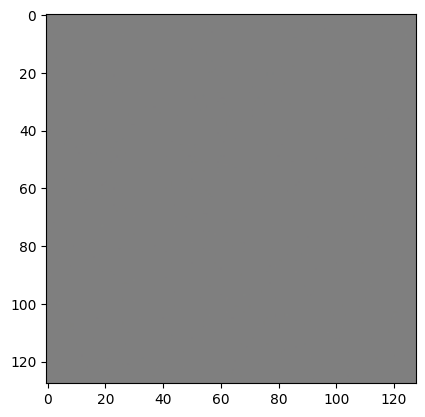

In [20]:
plt.imshow(pred[1][1])

se

In [27]:
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    print(physical_devices)
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])

    with strategy.scope():
        img_height, img_width, img_channels = 128, 128, 3
        seq_length = 59

        def create_model(input_shape):
            encoder_inputs = Input(shape=input_shape)
            encoded_seq = TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'))(encoder_inputs)
            encoded_seq = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(encoded_seq)
            encoded_seq = TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'))(encoded_seq)
            encoded_seq = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(encoded_seq)

            encoded_seq = ConvLSTM2D(32, (3, 3), activation='relu', padding='same', return_sequences=True)(encoded_seq)
            encoded_seq_reshaped = Reshape((seq_length, -1))(encoded_seq)

            decoded_seq = GRU(100, return_sequences=True)(encoded_seq_reshaped)
            decoded_seq = GRU(100, return_sequences=True)(decoded_seq)
            output_vector_seq = TimeDistributed(Dense(img_height * img_width * img_channels, activation='sigmoid'))(decoded_seq)
            output_image_seq = Reshape((seq_length, img_height, img_width, img_channels))(output_vector_seq)

            model = Model(encoder_inputs, output_image_seq)
            model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4, clipnorm=1.0), loss='mae')
            return model

        input_shape = (seq_length, img_height, img_width, img_channels)
        model = create_model(input_shape)

        def load_augmented_data(filepath):
            data = np.load(filepath)
            return data['inputs'], data['targets']

        save_directory = "/kaggle/working/augmented_data"
        prefix = "augmented_dataset"
        num_transformations = 3

        early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
        checkpoint = ModelCheckpoint('model_aug_m2.keras', monitor='val_loss', save_best_only=True, mode='min')

        for i in range(num_transformations):
            filepath = os.path.join(save_directory, f"{prefix}_{i}_augmented_data.npz")
            augmented_inputs, augmented_targets = load_augmented_data(filepath)

            dataset = tf.data.Dataset.from_tensor_slices((augmented_inputs, augmented_targets))
            dataset = dataset.batch(6).prefetch(tf.data.experimental.AUTOTUNE)

            history = model.fit(dataset, epochs=50, 
                                validation_data=(validation_input_sequences, validation_target_sequences),
                                callbacks=[checkpoint, early_stopping])

            model.save(f'model_after_m2_aug_{i}.keras')

            del augmented_inputs
            del augmented_targets
            tf.keras.backend.clear_session()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Epoch 1/50


2024-06-26 23:10:21.356946: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_1_1/conv_lstm2d_1/while/body/_1328/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/mul' -> 'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_1_1/conv_lstm2d_1/while/body/_1328/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/add_7', 'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_1_1/conv_lstm2d_1/while/body/_1328/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/Sigmoid' -> 'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_1_1/conv_lstm2d_1/while/body/_1328/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/mul_1', 'StatefulPartitionedCall/cond/else/_110/cond/StatefulPartitionedCall/functional_1_1/conv_lstm2d

ResourceExhaustedError: Graph execution error:

Detected at node gradient_tape/functional_1_1/time_distributed_1_2/strided_slice_38/StridedSliceGrad defined at (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 973, in _bootstrap

  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 66, in train_step

OOM when allocating tensor with shape[59,3,128,128,16] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/functional_1_1/time_distributed_1_2/strided_slice_38/StridedSliceGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_98801]

In [26]:
import gc 
tf.keras.backend.clear_session()
gc.collect()


0

In [13]:
model.save('motionV.keras')

### input_sequences[0].shape

## Test the Model

In [11]:
!gdown --id 1MISRjmQMh3vaKqY5dsFI87htxb9xvdyj

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1MISRjmQMh3vaKqY5dsFI87htxb9xvdyj
From (redirected): https://drive.google.com/uc?id=1MISRjmQMh3vaKqY5dsFI87htxb9xvdyj&confirm=t&uuid=160a267d-a9bc-4aba-ba7c-c8d839b736c0
To: /kaggle/working/test.npz
100%|███████████████████████████████████████| 1.37G/1.37G [00:08<00:00, 168MB/s]


In [13]:
testdata = np.load('/kaggle/working/test.npz')

# Accéder aux tableaux individuels
test_input_sequences = testdata['input']
test_target_sequences = testdata['target']

In [14]:
model.evaluate(test_input_sequences,test_target_sequences,verbose=1)

2024-06-12 13:26:52.438912: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'replica_1/functional_1_1/conv_lstm2d_1/while/body/_58/replica_1/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/Relu_1' -> 'replica_1/functional_1_1/conv_lstm2d_1/while/body/_58/replica_1/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/mul_2', 'Func/replica_1/functional_1_1/conv_lstm2d_1/while/body/_58/input/_174' -> 'replica_1/functional_1_1/conv_lstm2d_1/while/body/_58/replica_1/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/mul', 'replica_1/functional_1_1/conv_lstm2d_1/while/body/_58/replica_1/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/convolution_7' -> 'replica_1/functional_1_1/conv_lstm2d_1/while/body/_58/replica_1/functional_1_1/conv_lstm2d_1/while/conv_lstm_cell_1/add_8', 'functional_1_1/conv_lstm2d_1/while/body/_15/functional_1_1/conv_lstm2d_1/while/conv_lst

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 443ms/step - loss: 0.0485


0.04545437544584274

In [15]:
predictions = model.predict(test_input_sequences)

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


In [15]:
predictions.shape

(59, 59, 128, 128, 3)

In [12]:
import matplotlib.pyplot as plt

In [25]:
pred = model.predict(np.reshape(input_sequences[0], (1, 59, 128, 128, 3) ))           

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


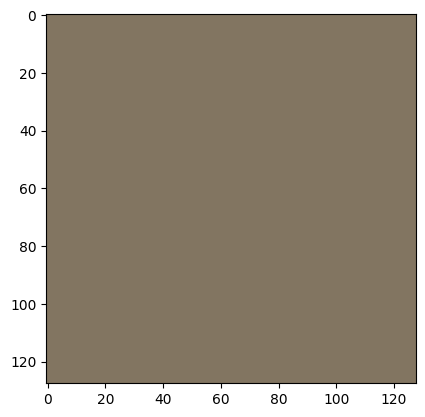

In [26]:
plt.imshow(pred[0][58])

In [17]:
import matplotlib.pyplot as plt

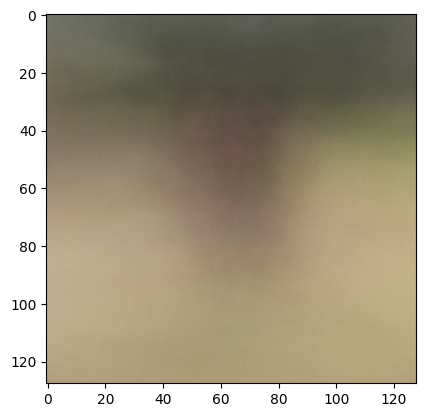

In [17]:
plt.imshow(predictions[8][1])

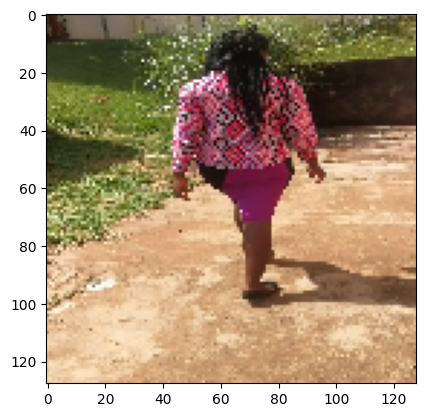

In [37]:
plt.imshow(test_input_sequences[8][1])

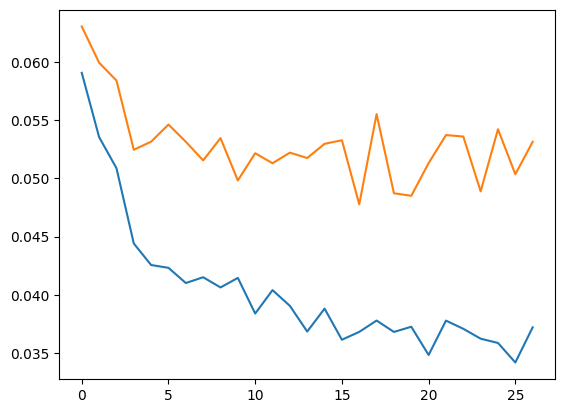

In [32]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## **Another Expriment Tracking**

In [27]:
from tensorflow.keras.models import Sequential


if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    print(physical_devices)
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])

    with strategy.scope():
        height, width, channels = 128, 128, 3
        seq_length = 59
# Define the model
        model4 = Sequential()

        # Encoder
        model4.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), input_shape=(None, height, width, channels), padding='same', return_sequences=False))
        # Decoder
        model4.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=True))
        model4.add(ConvLSTM2D(filters=1, kernel_size=(3, 3), padding='same', return_sequences=True))

        # Compile the model
        model4.compile(optimizer='adam', loss='mse')
        
        batch_size = 6
        # Train the model
        model4.fit(train_gen,batch_size=batch_size , epochs=15, validation_data=validation_gen)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


ValueError: Input 0 of layer "conv_lstm2d_14" is incompatible with the layer: expected ndim=5, found ndim=4. Full shape received: (None, 128, 128, 64)

In [29]:
model4(np.reshape(input_sequences[0], (1, 59, 128, 128, 3)))

ValueError: Sequential model 'sequential_7' has already been configured to use input shape (None, None, 128, 128, 3). You cannot build it with input_shape (1, 59, 128, 128, 3)

In [10]:
from keras.models import Sequential
from keras.layers import Conv3D
from keras.layers import BatchNormalization

In [21]:


# Assuming you have defined your model architecture and compiled it as 'seq'
#eq = ... (define and compile your model here)

if tf.test.is_gpu_available():
    strategy = tf.distribute.MirroredStrategy()
    with strategy.scope():
        seq = tf.keras.models.load_model('/kaggle/input/model3-100/keras/107/1/model_best (6).keras')

        # Define paths and parameters
        output_dir = '/kaggle/working/augmented_sequences'
        num_augmented_sequences = 1000
        batch_size = 6
        epochs = 10
        validation_split = 0.2

        # Function to load augmented sequences from disk
        def load_augmented_sequences(output_dir, num_augmented_sequences):
            input_sequences = []
            target_sequences = []
            for i in range(800):
                input_path = os.path.join(output_dir, f'input_seq_{i}.npy')
                target_path = os.path.join(output_dir, f'target_seq_{i}.npy')
                input_seq = np.load(input_path)
                target_seq = np.load(target_path)
                input_sequences.append(input_seq)
                target_sequences.append(target_seq)
            return np.array(input_sequences), np.array(target_sequences)

        # Load augmented sequences
        input_sequences, target_sequences = load_augmented_sequences(output_dir, num_augmented_sequences)

        # Split into training and validation sets
        num_samples = len(input_sequences)
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        train_indices = indices[:int(num_samples * (1 - validation_split))]
        val_indices = indices[int(num_samples * (1 - validation_split)):]

        training_input_sequences = input_sequences[train_indices]
        training_target_sequences = target_sequences[train_indices]
        validation_input_sequences = input_sequences[val_indices]
        validation_target_sequences = target_sequences[val_indices]

# Training with MirroredStrategy for multi-GPU

        seq.compile(loss='mae', optimizer='adam')
        # ModelCheckpoint callback to save the best model during training
        checkpoint = ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True, mode='min')

        # Train the model
        history = seq.fit(training_input_sequences, training_target_sequences,
                          batch_size=batch_size, epochs=epochs,
                          validation_data=(validation_input_sequences, validation_target_sequences),
                          callbacks=[checkpoint])

        # Optionally, you can save the final model
        seq.save('final_model_1.keras')

        print("Training complete.")
else:
    seq.compile(loss='binary_crossentropy', optimizer='adam')


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/augmented_sequences/input_seq_0.npy'

## **3ie Experience sur une autre architecture**

In [ ]:
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    print(physical_devices)
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])

    with strategy.scope():          
#         seq = Sequential()

#         seq.add(ConvLSTM2D(filters=20, kernel_size=(3, 3), 
#                            input_shape=(None, 128, 128, 3),
#                            padding='same', return_sequences=True))
#         seq.add(BatchNormalization())

#         seq.add(ConvLSTM2D(filters=20, kernel_size=(3, 3),
#                            padding='same', return_sequences=True))
#         seq.add(BatchNormalization())
        
#         seq.add(ConvLSTM2D(filters=17, kernel_size=(3, 3),
#                            padding='same', return_sequences=True))
#         seq.add(BatchNormalization())

#         seq.add(ConvLSTM2D(filters=15, kernel_size=(3, 3),
#                            padding='same', return_sequences=True))
#         seq.add(BatchNormalization())

#         seq.add(ConvLSTM2D(filters=15, kernel_size=(3, 3),
#                            padding='same', return_sequences=True))
#         seq.add(BatchNormalization())

#         seq.add(Conv3D(filters=3, kernel_size=(3, 3, 3),
#                        activation='sigmoid',
#                        padding='same', data_format='channels_last'))

        # Define paths and parameters
        batch_size = 6
        epochs = 10
        validation_split = 0.2
        
        def load_augmented_data(filepath):
            
            data = np.load(filepath)
            return data['inputs'], data['targets']

        # Define directory where augmented data is saved
        save_directory = "/kaggle/working/augmented_data"
        prefix = "augmented_dataset"
        num_transformations = 3  # Adjust this based on the number of transformations applied

#         # Load your pre-trained model
        model_path = '/kaggle/input/motion_adadelta/keras/model_delta/1/model3 (10).keras'
        seq = tf.keras.models.load_model(model_path)
        
        def psnr_loss(y_true, y_pred):
            return -tf.reduce_mean(tf.image.psnr(y_true, y_pred, max_val=1.0))

        seq.compile(loss=psnr_loss, optimizer=RMSprop(learning_rate=1e-3, clipnorm=1.0))

        # Define callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
        checkpoint = ModelCheckpoint('model_aug_2.keras', monitor='val_loss', save_best_only=True, mode='min')
        
        # Suppose you have your original validation data
        # validation_input_sequences, validation_target_sequences

        # Train sequentially on each augmented dataset
        for i in range(num_transformations):
            # Load augmented data
            filepath = os.path.join(save_directory, f"{prefix}_{i}_augmented_data.npz")
            augmented_inputs, augmented_targets = load_augmented_data(filepath)

            # Train the model with the current augmented dataset
            history3 = seq.fit(augmented_inputs, augmented_targets, batch_size=6, epochs=50,  # You can adjust the number of epochs
                    validation_data=(validation_input_sequences, validation_target_sequences),
                    callbacks=[checkpoint, early_stopping])

            # Save the model's state after training on each augmented dataset
            seq.save(f'model_after_aug_{i}.keras')

            # Clear memory by deleting the loaded data
            del augmented_inputs
            del augmented_targets

      

#         seq = tf.keras.models.load_model('/kaggle/input/motion_adadelta/keras/model_delta/1/model3 (10).keras')
#         seq.compile(loss='mae', optimizer='rmsprop')
#         early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
#         checkpoint = ModelCheckpoint('model_aug.keras', monitor='val_loss', save_best_only=True, mode='min')
#         history = seq.fit(training_input_sequences,training_target_sequences, batch_size=6,
#         epochs=50, validation_data=(validation_input_sequences,validation_target_sequences),callbacks=[checkpoint,early_stopping])

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Epoch 1/50


2024-07-02 14:13:06.244797: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'StatefulPartitionedCall/cond/then/_153/cond/StatefulPartitionedCall/sequential_1/conv_lstm2d_1/while/body/_796/sequential_1/conv_lstm2d_1/while/conv_lstm_cell_1/mul' -> 'StatefulPartitionedCall/cond/then/_153/cond/StatefulPartitionedCall/sequential_1/conv_lstm2d_1/while/body/_796/sequential_1/conv_lstm2d_1/while/conv_lstm_cell_1/add_7', 'StatefulPartitionedCall/cond/then/_153/cond/StatefulPartitionedCall/sequential_1/conv_lstm2d_1/while/body/_796/sequential_1/conv_lstm2d_1/while/conv_lstm_cell_1/convolution_6' -> 'StatefulPartitionedCall/cond/then/_153/cond/StatefulPartitionedCall/sequential_1/conv_lstm2d_1/while/body/_796/sequential_1/conv_lstm2d_1/while/conv_lstm_cell_1/add_6', 'StatefulPartitionedCall/cond/then/_153/cond/StatefulPartitionedCall/sequential_1/conv_lstm2d_1/while/body/_7

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: -12.3401

2024-07-02 14:14:31.396528: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'sequential_1/conv_lstm2d_3_1/while/sequential_1/conv_lstm2d_3_1/zeros_switch/_167-0-TransposeNHWCToNCHW-LayoutOptimizer' -> 'sequential_1/conv_lstm2d_3_1/while/sequential_1/conv_lstm2d_3_1/zeros_switch/_167', 'Func/sequential_1/conv_lstm2d_3_1/while/body/_144/input/_502' -> 'sequential_1/conv_lstm2d_3_1/while/body/_144/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul', 'sequential_1/conv_lstm2d_2_1/while/sequential_1/conv_lstm2d_2_1/zeros_switch/_124-0-TransposeNHWCToNCHW-LayoutOptimizer' -> 'sequential_1/conv_lstm2d_2_1/while/sequential_1/conv_lstm2d_2_1/zeros_switch/_124', 'Func/sequential_1/conv_lstm2d_2_1/while/body/_101/input/_467' -> 'sequential_1/conv_lstm2d_2_1/while/body/_101/sequential_1/conv_lstm2d_2_1/while/conv_lstm_cell_1/mul', 'Func/sequential_1/conv_lstm2d_1_2/whil

29/29 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - loss: -12.3453 - val_loss: -9.8083
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: -12.6957 - val_loss: -11.3011
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: -12.8415 - val_loss: -11.2286
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: -12.8365 - val_loss: -10.5225
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: -12.9757 - val_loss: -11.0549
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: -12.9506 - val_loss: -9.5298
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - loss: -12.8846 - val_loss: -11.4477
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - loss: -13.0501 - val_loss: -11.6455
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: -13.0270 - val_loss: -10.6735
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: -12.9604 - val_loss: -10.5895
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - loss: -13.1279 - val_loss: -11.0748
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s

In [21]:
tf.keras.backend.clear_session()
    

In [24]:
import gc 
del data
del testdata
# del history3
gc.collect()


NameError: name 'data' is not defined

In [14]:
seq.summary()     

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_4 (ConvLSTM2D)      │ (None, None, 128, 128, │        62,080 │
│                                 │ 40)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, None, 128, 128, │           160 │
│ (BatchNormalization)            │ 40)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_5 (ConvLSTM2D)      │ (None, None, 128, 128, │       115,360 │
│                                 │ 40)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, None, 128, 128, │           160 │
│ (BatchNormalization)            │ 40)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_6 (ConvLSTM2D)      │ (None, None, 128, 128, │       115,360 │
│                                 │ 40)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, None, 128, 128, │           160 │
│ (BatchNormalization)            │ 40)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_7 (ConvLSTM2D)      │ (None, None, 128, 128, │       115,360 │
│                                 │ 40)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, None, 128, 128, │           160 │
│ (BatchNormalization)            │ 40)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, None, 128, 128, │         3,243 │
│                                 │ 3)                     │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,043 (1.57 MB)

 Trainable params: 411,723 (1.57 MB)

 Non-trainable params: 320 (1.25 KB)

In [10]:
model1 = tf.keras.models.load_model('/kaggle/input/motion_adadelta/keras/model_delta/1/model3 (10).keras')

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

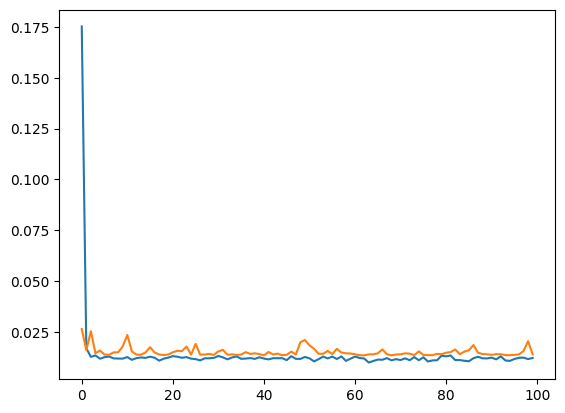

In [11]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

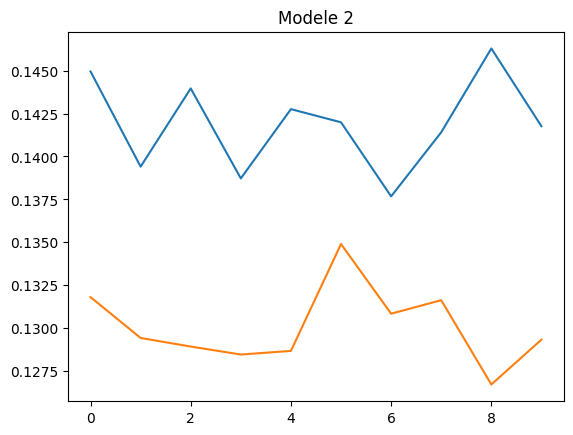

In [12]:
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Modele 2')
plt.show()

## Test 1 

In [10]:
pred = seq.predict(test_input_sequences)

2024-06-27 01:02:06.020318: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/Tanh_1' -> 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul_2', 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul' -> 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/add_7', 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/convolution_7' -> 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/ArithmeticOptimizer/AddOpsRewrite_Leaf_1_add_8', 'sequential_1/conv_lstm2d_2_1/while/body/_87/sequential_1/conv_lstm2d_2_1/while/conv_lstm_cell_1/mul' -> 'seq

2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 7s/step


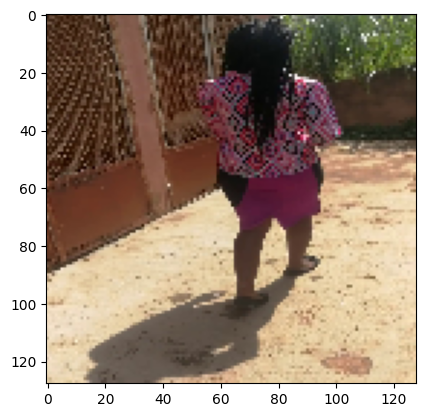

In [20]:
plt.imshow(test_input_sequences[1][1])

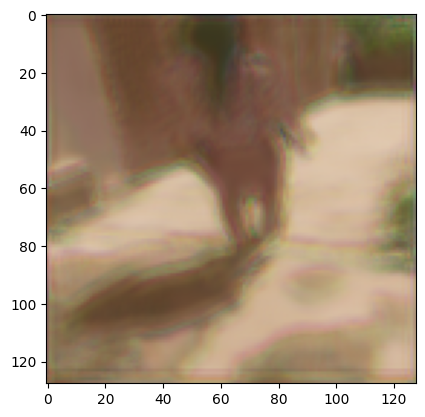

In [14]:
plt.imshow(pred[0][4])

# ***TEST 2***

In [11]:
import matplotlib.pyplot as plt

In [21]:
seq = tf.keras.models.load_model('/kaggle/input/motion_adadelta/keras/model_delta/1/model3 (10).keras')


In [35]:
seq.evaluate(test_input_sequences,test_target_sequences,verbose=1)

2024-06-20 21:55:22.780793: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'sequential_1/conv_lstm2d_3_1/while/body/_144/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul' -> 'sequential_1/conv_lstm2d_3_1/while/body/_144/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/add_7', 'sequential_1/conv_lstm2d_3_1/while/sequential_1/conv_lstm2d_3_1/zeros_switch/_167-0-TransposeNHWCToNCHW-LayoutOptimizer' -> 'sequential_1/conv_lstm2d_3_1/while/sequential_1/conv_lstm2d_3_1/zeros_switch/_167', 'sequential_1/conv_lstm2d_2_1/while/sequential_1/conv_lstm2d_2_1/zeros_switch/_124-0-TransposeNHWCToNCHW-LayoutOptimizer' -> 'sequential_1/conv_lstm2d_2_1/while/sequential_1/conv_lstm2d_2_1/zeros_switch/_124', 'sequential_1/conv_lstm2d_2_1/while/body/_101/sequential_1/conv_lstm2d_2_1/while/conv_lstm_cell_1/mul' -> 'sequential_1/conv_lstm2d_2_1/while/body/_101/sequential_1/co

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0455


0.04423875734210014

In [36]:
pred = seq.predict(test_input_sequences)

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step


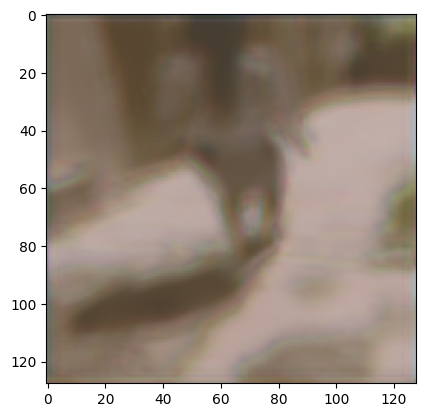

In [38]:
plt.imshow(pred[0][1])

### FIN DATA AUGMENTATION TEST 

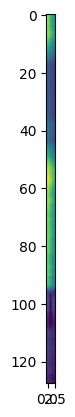

In [13]:
plt.imshow(augmented_input_sequences[1][9][50])

In [12]:
history

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
!conda install -y gdown
!gdown --id 1MISRjmQMh3vaKqY5dsFI87htxb9xvdyj

In [11]:
pred = model1.predict(test_input_sequences)

2024-06-15 22:13:20.345702: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: MutableGraphView::SortTopologically error: detected edge(s) creating cycle(s) {'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul' -> 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/add_7', 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/Tanh_1' -> 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/mul_2', 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/convolution_7' -> 'sequential_1/conv_lstm2d_3_1/while/body/_130/sequential_1/conv_lstm2d_3_1/while/conv_lstm_cell_1/ArithmeticOptimizer/AddOpsRewrite_Leaf_1_add_8', 'sequential_1/conv_lstm2d_2_1/while/body/_87/sequential_1/conv_lstm2d_2_1/while/conv_lstm_cell_1/mul' -> 'seq

2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 11s/step


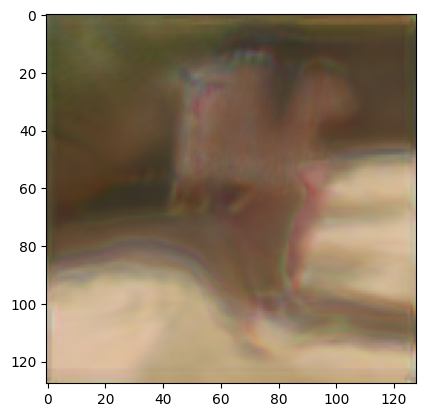

In [17]:
plt.imshow(pred[9][20])

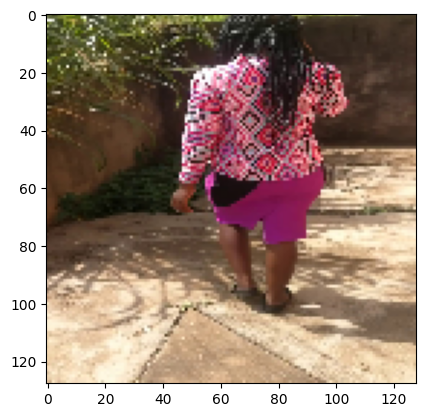

In [18]:
plt.imshow(test_input_sequences[9][20])

In [19]:
import cv2
import numpy as np
import tensorflow as tf

In [20]:
# Fonction pour normaliser les images entre 0 et 255
def denormalize(img):
    img = img - img.min()
    img = img / img.max()
    img = (img * 255).astype(np.uint8)
    return img

# Fonction pour écrire la vidéo
def write_video(predicted_sequences, output_file):
    # Dimensions des images
    seq_length, img_height, img_width, img_channels = predicted_sequences.shape

    # Définir le codec et créer l'objet VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_file, fourcc, 5.0, (img_width, img_height))

    for j in range(seq_length):
        frame = predicted_sequences[j]
        frame = denormalize(frame) # Dénormaliser l'image pour qu'elle soit entre 0 et 255
        out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

    out.release()
    print(f"Vidéo enregistrée sous {output_file}")

In [23]:
write_video(pred[1], 'output_video_1.avi')

Vidéo enregistrée sous output_video_1.avi


## **GAN ARCHITECTURE**

In [8]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

2024-06-18 04:30:28.610442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 04:30:28.610568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 04:30:28.901707: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:

if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    print(physical_devices)
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])

    with strategy.scope():       

        # Définir le modèle du discriminateur
        discriminator = keras.Sequential(
              [
                    keras.Input(shape=(59, 128, 128, 3)),
                    layers.Conv3D(32, kernel_size=(3, 4, 4), strides=(1, 2, 2), padding="same"),
                    layers.LeakyReLU(0.2),
                    layers.Conv3D(64, kernel_size=(3, 4, 4), strides=(1, 2, 2), padding="same"),
                    layers.LeakyReLU(0.2),
                    layers.Conv3D(64, kernel_size=(3, 4, 4), strides=(1, 2, 2), padding="same"),
                    layers.LeakyReLU(0.2),
                    layers.Flatten(),
                    layers.Dropout(0.2),
                    layers.Dense(1, activation="sigmoid"),
                ]
        )

        print(discriminator.summary())

        # Définir le modèle du générateur
        latent_dim = 128
        num_epochs = 10
        batch_size = 32
        numseq = 59
        width = 128
        height = 128
        channels = 3

        generator = keras.Sequential(
          [
                    layers.Input(shape=(latent_dim,)),
                    layers.Dense(8 * 8 * 128 * numseq),
                    layers.Reshape((numseq, 8, 8, 128)),
                    layers.Conv3DTranspose(64, kernel_size=(3, 4, 4), strides=(1, 2, 2), padding="same"),
                    layers.LeakyReLU(0.2),
                    layers.Conv3DTranspose(128, kernel_size=(3, 4, 4), strides=(1, 2, 2), padding="same"),
                    layers.LeakyReLU(0.2),
                    layers.Conv3DTranspose(126, kernel_size=(3, 4, 4), strides=(1, 2, 2), padding="same"),
                    layers.LeakyReLU(0.2),
                    layers.Conv3DTranspose(channels, kernel_size=(3, 4, 4), padding="same", activation="sigmoid"),
                ]
        )

        print(generator.summary())

        # Optimiseurs et fonction de perte
        opt_gen = keras.optimizers.Adam(1e-4)
        opt_disc = keras.optimizers.Adam(1e-4)
        loss_fn = keras.losses.BinaryCrossentropy()


        # Entraînement du GAN
        batch_size = 32  # Adjust batch size as needed

        for epoch in range(num_epochs):
            for batch_start in range(0, len(input_sequences), batch_size):
                batch_end = min(batch_start + batch_size, len(input_sequences))
                batch_sequences = input_sequences[batch_start:batch_end]  # Shape: (batch_size, numseq, width, height, channels)

                real = tf.convert_to_tensor(batch_sequences, dtype=tf.float32)

                random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim))
                fake = generator(random_latent_vectors)
                fake = tf.expand_dims(fake, axis=1)  # Ajoute une dimension pour correspondre à (batch_size, numseq, width, height, channels)

                # Entraînement du discriminateur
                with tf.GradientTape() as disc_tape:
                    loss_disc_real = loss_fn(tf.ones((batch_size, 1)), discriminator(real))
                    loss_disc_fake = loss_fn(tf.zeros((batch_size, 1)), discriminator(fake))
                    loss_disc = (loss_disc_real + loss_disc_fake) / 2

                grads = disc_tape.gradient(loss_disc, discriminator.trainable_weights)
                opt_disc.apply_gradients(zip(grads, discriminator.trainable_weights))

                # Entraînement du générateur
                with tf.GradientTape() as gen_tape:
                    fake = generator(random_latent_vectors)
                    fake = tf.expand_dims(fake, axis=1)  # Ajoute une dimension pour correspondre à (batch_size, numseq, width, height, channels)
                    output = discriminator(fake)
                    loss_gen = loss_fn(tf.ones((batch_size, 1)), output)

                grads = gen_tape.gradient(loss_gen, generator.trainable_weights)
                opt_gen.apply_gradients(zip(grads, generator.trainable_weights))

                # Sauvegarde des images générées
                if batch_start % 100 == 0:
                    generated_image = tf.squeeze(fake[0, 0], axis=0).numpy()  # Prendre la première image de la première séquence du batch
                    img = keras.preprocessing.image.array_to_img(generated_image)
                    if not os.path.exists('generated_images'):
                        os.makedirs('generated_images')
                    img.save(f"generated_images/generated_img_epoch_{epoch}_batch_{batch_start}.png")

                print(f"Epoch {epoch}, Batch {batch_start}: Discriminator Loss: {loss_disc.numpy()}, Generator Loss: {loss_gen.numpy()}")

        print("Training complete.")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 59, 64, 64, 32) │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 59, 64, 64, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 59, 32, 32, 64) │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 59, 32, 32, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 59, 16, 16, 64) │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 59, 16, 16, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 966656)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 966656)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       966,657 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,266,337 (4.83 MB)

 Trainable params: 1,266,337 (4.83 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 483328)         │    62,349,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 59, 8, 8, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_transpose                │ (None, 59, 16, 16, 64) │       393,280 │
│ (Conv3DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 59, 16, 16, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_transpose_1              │ (None, 59, 32, 32,     │       393,344 │
│ (Conv3DTranspose)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 59, 32, 32,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_transpose_2              │ (None, 59, 64, 64,     │       774,270 │
│ (Conv3DTranspose)               │ 126)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 59, 64, 64,     │             0 │
│                                 │ 126)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_transpose_3              │ (None, 59, 64, 64, 3)  │        18,147 │
│ (Conv3DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,928,353 (243.87 MB)

 Trainable params: 63,928,353 (243.87 MB)

 Non-trainable params: 0 (0.00 B)

None


ResourceExhaustedError: Exception encountered when calling Conv3DTranspose.call().

[1m{{function_node __wrapped__Conv3DBackpropInputV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[32,126,59,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv3DBackpropInputV2][0m

Arguments received by Conv3DTranspose.call():
  • inputs=tf.Tensor(shape=(32, 59, 64, 64, 126), dtype=float32)

In [15]:
input_sequences.shape

(170, 59, 128, 128, 3)

In [9]:
import numpy as np
from imgaug.augmenters import Sequential, Sometimes, Affine, Fliplr, Flipud, Rotate, TranslateX, TranslateY, GaussianBlur, Multiply, Grayscale
import os

# Function to save augmented data to disk
def save_augmented_data(augment_inputs, augment_targets, save_dir, prefix):
    np.savez(os.path.join(save_dir, f"{prefix}_augmented_data.npz"), inputs=augment_inputs, targets=augment_targets)

# Example of video augmentation with saving to disk after each transformation
def augment_and_save_videos(inputs, targets, save_dir, prefix):
    # List of transformations to apply
    transformations = [
#         Sometimes(0.5, Affine(rotate=(-10, 10))),  # Random rotation between -10 to 10 degrees
#         Sometimes(0.5, TranslateX(percent=(-0.2, 0.2))),  # Random horizontal translation
#         Sometimes(0.5, TranslateY(percent=(-0.2, 0.2))),  # Random vertical translation
#         Sometimes(0.5, Fliplr()),  # Horizontal flip with 50% probability
        Sometimes(0.5, Flipud()),  # Vertical flip with 50% probability
        Sometimes(0.5, Rotate((-10, 10))),  # Rotate by -10 to 10 degrees
#         Sometimes(0.5, GaussianBlur(sigma=(0, 0.5))),  # Gaussian blur with sigma ranging from 0 to 0.5
        Sometimes(0.5, Multiply((0.8, 1.2), per_channel=0.2)),  # Brightness/contrast changes
#         Sometimes(0.5, Grayscale(alpha=(0.0, 1.0))),  # Convert to grayscale with random alpha
#         Sometimes(0.5, Affine(scale=(0.8, 1.2))),  # Scale changes
    ]

    # Initialize lists to store augmented videos and corresponding targets
    augment_inputs = []
    augment_targets = []

    for transformation in transformations:
        augmented_inputs = []
        augmented_targets = []

        for input_video, target_data in zip(inputs, targets):
            # Apply transformation to each video and its targets
            augmented_video = transformation.augment_images(input_video)
            
            # If necessary, adapt transformation to targets here
            
            # Append augmented video and target to lists
            augmented_inputs.append(augmented_video)
            augmented_targets.append(target_data)

        # Save augmented data to disk after each transformation
        save_augmented_data(np.array(augmented_inputs), np.array(augmented_targets), save_dir, f"{prefix}_{transformations.index(transformation)}")

        # Clear lists to free memory for next transformation
        augment_inputs.clear()
        augment_targets.clear()

# Suppose 'inputs' and 'targets' are your numpy arrays of shape (170, 59, 128, 128, 3)
# Define directory to save augmented data
save_directory = "/kaggle/working/augmented_data"

# Create directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Augment videos with saving to disk after each transformation
augment_and_save_videos(input_sequences, target_sequences, save_directory, "augmented_dataset")


In [6]:
data1 = np.load('/kaggle/working/augmented_data/augmented_dataset_0_augmented_data.npz')

# Accéder aux tableaux individuels
input_sequences_1 = data1['inputs']
target_sequences_1 = data1['targets']

In [8]:
import matplotlib.pyplot as plt

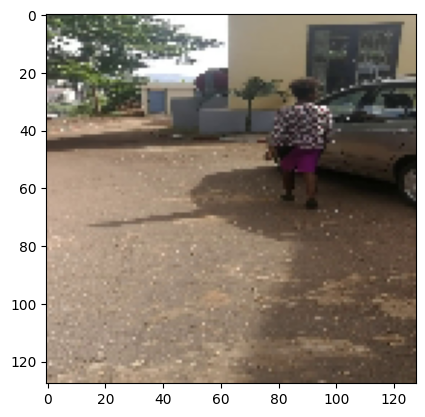

In [11]:
plt.imshow(input_sequences_1[1][1])

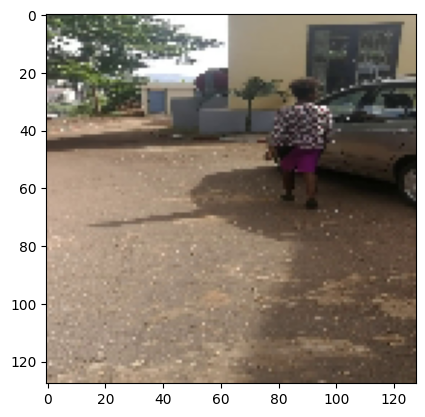

In [13]:
plt.imshow(input_sequences[1][1])

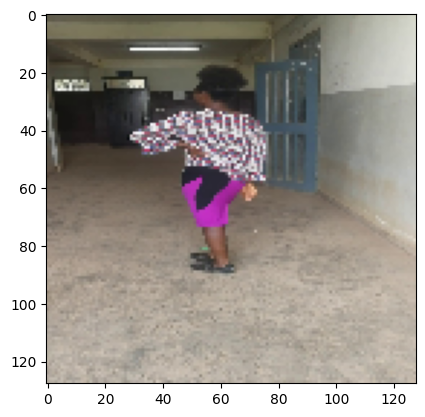

In [ ]:
plt.imshow(target_sequences_1[8][1])

In [11]:
import cv2
import random

# Function to save augmented data to disk
def save_augmented_data(augment_inputs, augment_targets, save_dir, prefix):
    np.savez(os.path.join(save_dir, f"{prefix}_augmented_data.npz"), inputs=augment_inputs, targets=augment_targets)

# Transformation functions using OpenCV
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (cols, rows))

def flip_image(image, horizontal=True):
    flip_code = 0 if not horizontal else 1
    return cv2.flip(image, flip_code)

def apply_gaussian_blur(image, sigma):
    return cv2.GaussianBlur(image, (0, 0), sigma)

def convert_to_grayscale(image, alpha):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    return cv2.addWeighted(image, 1 - alpha, gray_image, alpha, 0)

# Example of video augmentation with saving to disk after each transformation
def augment_and_save_videos(inputs, targets, save_dir, prefix):
    # List of transformations to apply
    transformations = [
#         lambda img: translate_image(img, tx=random.uniform(-0.2, 0.2) * img.shape[1], ty=0),  # Random horizontal translation
        lambda img: flip_image(img, horizontal=False),  # Vertical flip with 50% probability
        lambda img: apply_gaussian_blur(img, sigma=random.uniform(0, 0.5)),  # Gaussian blur with sigma ranging from 0 to 0.5
        lambda img: convert_to_grayscale(img, alpha=random.uniform(0.0, 1.0))  # Convert to grayscale with random alpha
    ]

    # Initialize lists to store augmented videos and corresponding targets
    augment_inputs = []
    augment_targets = []

    for transformation in transformations:
        augmented_inputs = []
        augmented_targets = []

        for input_video, target_data in zip(inputs, targets):
            augmented_video = np.array([transformation(frame) for frame in input_video])
            
            # If necessary, adapt transformation to targets here
            
            # Append augmented video and target to lists
            augmented_inputs.append(augmented_video)
            augmented_targets.append(target_data)

        # Save augmented data to disk after each transformation
        save_augmented_data(np.array(augmented_inputs), np.array(augmented_targets), save_dir, f"{prefix}_{transformations.index(transformation)}")

        # Clear lists to free memory for next transformation
        augment_inputs.clear()
        augment_targets.clear()

# Suppose 'inputs' and 'targets' are your numpy arrays of shape (170, 59, 128, 128, 3)
# Define directory to save augmented data
save_directory = "/kaggle/working/augmented_data"

# Create directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Augment videos with saving to disk
augment_and_save_videos(input_sequences, target_sequences, save_directory, "augmented_dataset")

In [21]:
import shutil
import os

# Spécifiez le chemin du dossier que vous souhaitez supprimer
directory = '/kaggle/working/augmented_data'

# Vérifiez que le dossier existe avant de le supprimer
if os.path.exists(directory):
    try:
        # Supprimez le dossier et tout son contenu
        shutil.rmtree(directory)
        print(f'Le dossier {directory} a été supprimé avec succès.')
    except Exception as e:
        print(f'La suppression du dossier {directory} a échoué. Raison : {e}')
else:
    print(f'Le dossier {directory} n\'existe pas.')


Le dossier /kaggle/working/augmented_data a été supprimé avec succès.
